In [1]:
import pandas as pd

# Debemos instalar en Anaconda el paquete xlrd
# Miramos el actual directorio de trabajo

import os
print(os.getcwd())

ext1 = pd.read_excel('EventsJul18.xlsx')
ext2 = pd.read_excel('EventsAug18.xlsx')
ext3 = pd.read_excel('EventsSept18.xlsx')
ext4 = pd.read_excel('EventsOct18.xlsx')
ext5 = pd.read_excel('EventsNov18.xlsx')
ext6 = pd.read_excel('EventsDec18.xlsx')
ext7 = pd.read_excel('EventsJan19.xlsx')
ext8 = pd.read_excel('EventsFeb19.xlsx')

C:\Users\molin\Desktop\UOC\TFM\Python_Pandas_CodigoTFM


In [2]:
data=pd.concat([ext1,ext2,ext3,ext4,ext5,ext6,ext8], ignore_index=True)
data.head()

,ev_ID,ev_ReceivingTime,ev_ReceivingTimeUTC,ev_EventTime,PatientRef,BedRef,dev_ID,ev_DeviceName,ev_SerialNumber,ev_DeviceNumber,ev_EventType,ev_Status,ev_Description,ev_DescriptionLocalized,par_ID,ev_CustomData,ev_Code,ev_EndEvent,ev_PhysicalDeviceNumber
0,52085,2018-07-01 08:19:25,2018-07-01 06:19:25,2018-07-01 06:19:25,0,16,2,BIG_DIPPER,00-0B-AB-04-9B-D7-63-CC,NaN,10,NaN,The device BIG_DIPPER (00-0B-AB-04-9B-D7-63-CC...,The device BIG_DIPPER (00-0B-AB-04-9B-D7-63-CC...,0,NaN,256,0,NaN
1,52087,2018-07-01 08:20:17,2018-07-01 06:20:17,2018-07-01 06:20:17,0,16,2,BIG_DIPPER,00-0B-AB-04-9B-D7-63-CC,NaN,50,NaN,Sensor SpO2 descon,Sensor SpO2 descon,0,NaN,202834|1.3.1.202834,0,NaN
2,52090,2018-07-01 08:20:59,2018-07-01 06:20:59,2018-07-01 06:20:59,0,16,2,BIG_DIPPER,00-0B-AB-04-9B-D7-63-CC,NaN,60,NaN,FR alta,FR alta,0,NaN,196652|1.7.1.151578,0,NaN
3,52092,2018-07-01 08:21:07,2018-07-01 06:21:07,2018-07-01 06:21:06,0,16,2,BIG_DIPPER,00-0B-AB-04-9B-D7-63-CC,NaN,60,NaN,FR alta,FR alta,0,NaN,196652|1.7.1.151578,1,NaN
4,52093,2018-07-01 08:21:35,2018-07-01 06:21:35,2018-07-01 06:21:35,0,16,2,BIG_DIPPER,00-0B-AB-04-9B-D7-63-CC,NaN,50,NaN,No hay sensor SpO2,No hay sensor SpO2,0,NaN,30218|1.3.1.30218,0,NaN


In [3]:
# Eliminamos las columnas que sabemos que no van a resultar util
data1=data.drop(columns=['ev_ReceivingTime','ev_ReceivingTimeUTC','dev_ID','ev_DeviceNumber','ev_Status','ev_DescriptionLocalized','par_ID', 'ev_PhysicalDeviceNumber','ev_CustomData'], axis='1')
data1.head()

,ev_ID,ev_EventTime,PatientRef,BedRef,ev_DeviceName,ev_SerialNumber,ev_EventType,ev_Description,ev_Code,ev_EndEvent
0,52085,2018-07-01 06:19:25,0,16,BIG_DIPPER,00-0B-AB-04-9B-D7-63-CC,10,The device BIG_DIPPER (00-0B-AB-04-9B-D7-63-CC...,256,0
1,52087,2018-07-01 06:20:17,0,16,BIG_DIPPER,00-0B-AB-04-9B-D7-63-CC,50,Sensor SpO2 descon,202834|1.3.1.202834,0
2,52090,2018-07-01 06:20:59,0,16,BIG_DIPPER,00-0B-AB-04-9B-D7-63-CC,60,FR alta,196652|1.7.1.151578,0
3,52092,2018-07-01 06:21:06,0,16,BIG_DIPPER,00-0B-AB-04-9B-D7-63-CC,60,FR alta,196652|1.7.1.151578,1
4,52093,2018-07-01 06:21:35,0,16,BIG_DIPPER,00-0B-AB-04-9B-D7-63-CC,50,No hay sensor SpO2,30218|1.3.1.30218,0


In [4]:
# Filtramos y eliminamos los datos (filas) que contengan determinadas condiciones:

# Datos procedentes del rack de bombas (AGW) no interesan
data2 = data1.drop(data1[data1['ev_DeviceName']=='AGW'].index)

# Datos con información de la medicación de la bomba, no relaionado con las alarmas
data3 = data2.drop(data2[(data2['ev_EventType']==10)|(data2['ev_EventType']==20)|(data2['ev_EventType']==30)].index)

# Datos que indican finalización de la alarma, sólo nos interesan las que se generan
data4 = data3.drop(data3[data3['ev_EndEvent']==1].index)

data4

,ev_ID,ev_EventTime,PatientRef,BedRef,ev_DeviceName,ev_SerialNumber,ev_EventType,ev_Description,ev_Code,ev_EndEvent
1,52087,2018-07-01 06:20:17,0,16,BIG_DIPPER,00-0B-AB-04-9B-D7-63-CC,50,Sensor SpO2 descon,202834|1.3.1.202834,0
2,52090,2018-07-01 06:20:59,0,16,BIG_DIPPER,00-0B-AB-04-9B-D7-63-CC,60,FR alta,196652|1.7.1.151578,0
4,52093,2018-07-01 06:21:35,0,16,BIG_DIPPER,00-0B-AB-04-9B-D7-63-CC,50,No hay sensor SpO2,30218|1.3.1.30218,0
6,52095,2018-07-01 06:21:38,0,16,BIG_DIPPER,00-0B-AB-04-9B-D7-63-CC,40,Sensor SpO2 descon,202834|1.3.1.202834,0
7,52096,2018-07-01 06:23:17,0,16,BIG_DIPPER,00-0B-AB-04-9B-D7-63-CC,40,Búsqueda pulso SpO2,30211|1.3.1.30211,0
8,52118,2018-07-01 06:28:44,0,16,BIG_DIPPER,00-0B-AB-04-9B-D7-63-CC,60,FR alta,196652|1.7.1.151578,0
10,54348,2018-07-01 12:19:50,0,24,BIG_DIPPER,00-0B-AB-04-9B-D7-62-57,40,Deriv. ECG desconect.,196880|1.7.0.196880,0
11,54353,2018-07-01 12:20:15,0,24,BIG_DIPPER,00-0B-AB-04-9B-D7-62-57,40,Deriv. ECG desconect.,196880|1.7.0.196880,0
13,54356,2018-07-01 12:21:31,0,24,BIG_DIPPER,00-0B-AB-04-9B-D7-62-57,50,Deriv. ECG desconect.,196880|1.7.0.196880,0
15,54372,2018-07-01 12:22:33,0,24,BIG_DIPPER,00-0B-AB-04-9B-D7-62-57,60,FR alta,196652|1.7.1.151578,0


In [5]:
### Cambiar valores BedRef con la referencia real del servicio

# 1. Cambiamos el tipo de dato de la columna BedRef
data4['BedRef'] = data4['BedRef'].astype(str)

# 2. Creamos diccionario con valores a reemplazar (información proporcionada por el fabricante)
bed = {'15':'U01', '16':'U02','17':'S17','24':'U04','25':'U05','26':'U03','27':'S18','28':'S19','29':'S20','30':'U06','31':'U07','32':'U08','33':'U09','34':'U10','35':'U11','36':'U12','37':'U13','38':'U14','39':'U15','40':'U16','41':'U21','42':'U22','43':'U23','44':'U24','45':'U25','46':'U26','47':'U27','48':'U28'}

# 3. Realizamos el intercambio de valores
data4['BedRef'] = data4['BedRef'].apply(lambda x:bed[x])

In [6]:
# Observemos que clase de objetos tenemos en nuestros datos:
data4.dtypes

# Como vemos, la mayoria de valores son de tipo entero, fecha o bien "object" que es un tipo poco útil.  

ev_ID                       int64
ev_EventTime       datetime64[ns]
PatientRef                  int64
BedRef                     object
ev_DeviceName              object
ev_SerialNumber            object
ev_EventType                int64
ev_Description             object
ev_Code                    object
ev_EndEvent                 int64
dtype: object

In [7]:
# Períodos de filtraje:
import numpy as np

filt1 = np.datetime64('2018-05-14')
filt2 = np.datetime64('2018-07-02')
filt3 = np.datetime64('2019-02-10')

# Extración de períodos en horas
periodo1 = (filt2)-(filt1)
periodo2 = (filt3)-(filt2)
print (periodo1)
print (periodo2)

49 days
223 days


In [8]:
# Cargamos alarmas filtraje Mindray

alarmsMindray = pd.read_excel('Alarmas_Mindray.xlsx')

# Eliminamos las columnas que sabemos que no van a resultar util
alarmsMindray=alarmsMindray.drop(columns=['Level','Class','Short Text','New Level','New Class','Text ENG','Text ENG Short', 'Text USER','Text USER Short','Aux1','Aux2'], axis='1')
print(alarmsMindray.head())

# Filtramos datos 0,1 y 2 según los tres filtrados
Mindray1_alarms0 = alarmsMindray[alarmsMindray['1º Tractament'] == 0]
Mindray1_alarms1 = alarmsMindray[alarmsMindray['1º Tractament'] == 1]
Mindray1_alarms2 = alarmsMindray[alarmsMindray['1º Tractament'] == 2]

Mindray2_alarms0 = alarmsMindray[alarmsMindray['2º Tractament'] == 0]
Mindray2_alarms1 = alarmsMindray[alarmsMindray['2º Tractament'] == 1]
Mindray2_alarms2 = alarmsMindray[alarmsMindray['2º Tractament'] == 2]

Mindray3_alarms0 = alarmsMindray[alarmsMindray['3º Tractament2'] == 0]
Mindray3_alarms1 = alarmsMindray[alarmsMindray['3º Tractament2'] == 1]
Mindray3_alarms2 = alarmsMindray[alarmsMindray['3º Tractament2'] == 2]

                 Code                 Text  1º Tractament  2º Tractament  \
0             30905|*     *** extrem. alta              0              0   
1             30906|*     *** extrem. baja              0              0   
2             30174|*   *** fuera de rango              0              0   
3            197018|*  *** límite superado              2              2   
4  30615|1.13.0.30615      ¿Fuga vía aér.?              0              0   

   3º Tractament2  
0               0  
1               0  
2               0  
3               1  
4               0  


In [9]:
# Cargamos alarmas filtraje Bombas

alarmsBombas = pd.read_excel('Alarmas_Bombas.xlsx')

alarmsBombas.head()

# Eliminamos las columnas que sabemos que no van a resultar util
alarmsBombas=alarmsBombas.drop(columns=['Level','Class','Short Text'], axis='1')
print(alarmsBombas.head())


# Filtramos datos "Level=0" y "Level=1"
Bombas1_alarms0 = alarmsBombas[alarmsBombas['1º Tractament'] == 0]
Bombas1_alarms1 = alarmsBombas[alarmsBombas['1º Tractament'] == 1]

Bombas2_alarms0 = alarmsBombas[alarmsBombas['2º Tractament'] == 0]
Bombas2_alarms1 = alarmsBombas[alarmsBombas['2º Tractament'] == 1]

Bombas3_alarms0 = alarmsBombas[alarmsBombas['3º Tractament2'] == 0]
Bombas3_alarms1 = alarmsBombas[alarmsBombas['3º Tractament2'] == 1]

  Code                                               Text  1º Tractament  \
0  120                  Sequence number incorrect (lower)              0   
1  121  Anomaly on AGW. Infusion parameters are not ch...              0   
2  122                 AGW Version not supported: {0} {1}              0   
3  123                        Battery level low. {0} left              0   
4  200                                              Bolus              0   

   2º Tractament  3º Tractament2  
0              0               0  
1              0               0  
2              0               0  
3              0               0  
4              0               0  


In [10]:
# Cargamos alarmas filtraje Respiradores (+ Prismaflex)

alarmsResp = pd.read_excel('Alarmas_Respiradores.xlsx')

# Eliminamos las columnas que sabemos que no van a resultar util
alarmsResp=alarmsResp.drop(columns=['Level','Class','Short Text','Aux1','Aux2'], axis='1')
print(alarmsResp.head())

# Filtramos datos "Level=0" y "Level=1"
Resp1_alarms0 = alarmsResp[alarmsResp['1º Tractament'] == 0]
Resp1_alarms1 = alarmsResp[alarmsResp['1º Tractament'] == 1]
Resp1_alarms2 = alarmsResp[alarmsResp['1º Tractament'] == 2]

Resp2_alarms0 = alarmsResp[alarmsResp['2º Tractament'] == 0]
Resp2_alarms1 = alarmsResp[alarmsResp['2º Tractament'] == 1]
Resp2_alarms2 = alarmsResp[alarmsResp['2º Tractament'] == 2]

Resp3_alarms0 = alarmsResp[alarmsResp['3º Tractament2'] == 0]
Resp3_alarms1 = alarmsResp[alarmsResp['3º Tractament2'] == 1]
Resp3_alarms2 = alarmsResp[alarmsResp['3º Tractament2'] == 2]

                Code                     Text  1º Tractament  2º Tractament  \
0           108|VRPT                    Apnea              2              2   
1  104|VRPT;52|MISCA     Batería interna baja              0              0   
2           126|VRPT                EPAP baja              1              0   
3           106|VRPT   Fallo alarma principal              0              0   
4           110|VRPT  Fallo de fuente de aire              0              0   

   3º Tractament2  
0               1  
1               0  
2               0  
3               0  
4               0  


In [11]:
# Cálculo de estadísticos interesantes totales

# Cantidad de alarmas por código
alarms_counts = data4.groupby('ev_Code')['ev_ID'].count()
print(alarms_counts)

# Si lo realizamos por descripción, los valores deberían ser los mismos:
alarms_counts2 = data4.groupby('ev_Description')['ev_ID'].count()
print(alarms_counts2)

# Cantidad de alarmas por boxes
alarms_counts3 = data4.groupby('BedRef')['ev_ID'].count()
print(alarms_counts3)

# Cantidad de alarmas por dispositivos (Bombas, Monitor, Respirador)
alarms_counts4 = data4.groupby('ev_DeviceName')['ev_ID'].count()
print(alarms_counts4)


ev_Code
3             2
11            1
194           1
195           1
197           1
199           2
209           1
262           3
337           2
400         486
401        1606
410       92342
411       34503
412         412
413          16
417           4
423          19
424       41077
430          10
431         403
432        2601
433       19281
434        2382
435       26289
436        4990
437       20793
438       13268
439          11
440          50
441         320
          ...  
LVP 09      210
LVP 10      105
LVP 12       29
LVP 14      166
LVP 15        1
LVP 16        2
LVP 17       25
LVP 18        8
LVP 19      746
LVP 20        4
LVP 21      416
LVP 22      971
LVP 23       13
LVP 25       23
LVP 28     2764
SYR 01       16
SYR 02     1385
SYR 03        5
SYR 04     8746
SYR 06      519
SYR 07       17
SYR 08    22235
SYR 09    17499
SYR 10     2934
SYR 11      196
SYR 12       95
SYR 13       31
SYR 14      401
SYR 15     6505
SYR 16       17
Name: ev_ID, Len

In [12]:
# Agrupamos alarmas nivel 0 de todos los dispositivos del primer filtrado

filt1_level0=pd.concat([Mindray1_alarms0,Bombas1_alarms0,Resp1_alarms0], ignore_index=True)
print(filt1_level0.head())

# Agrupamos alarmas nivel 1 de todos los dispositivos del primer filtrado

filt1_level1=pd.concat([Mindray1_alarms1,Bombas1_alarms1,Resp1_alarms1], ignore_index=True)
print(filt1_level1.head())

# Agrupamos alarmas nivel 2 de todos los dispositivos del primer filtrado

filt1_level2=pd.concat([Mindray1_alarms2,Resp1_alarms2], ignore_index=True)
print(filt1_level2.head())

                 Code                Text  1º Tractament  2º Tractament  \
0             30905|*    *** extrem. alta              0              0   
1             30906|*    *** extrem. baja              0              0   
2             30174|*  *** fuera de rango              0              0   
3  30615|1.13.0.30615     ¿Fuga vía aér.?              0              0   
4  30596|1.14.0.30596         ¿GAS NUEVO?              0              0   

   3º Tractament2  
0               0  
1               0  
2               0  
3               0  
4               0  
                  Code        Text  1º Tractament  2º Tractament  \
0  196652|1.1.1.150038  Art-D alta              1              1   
1  196674|1.1.1.150038  Art-D baja              1              1   
2  196652|1.1.1.150039  Art-M alta              1              1   
3  196674|1.1.1.150039  Art-M baja              1              1   
4  196652|1.1.1.150037  Art-S alta              1              1   

   3º Tractament2  


In [13]:
# Agrupamos alarmas nivel 0 de todos los dispositivos del segundo filtrado

filt2_level0=pd.concat([Mindray2_alarms0,Bombas2_alarms0,Resp2_alarms0], ignore_index=True)
print(filt2_level0.head())

# Agrupamos alarmas nivel 1 de todos los dispositivos del segundo filtrado

filt2_level1=pd.concat([Mindray2_alarms1,Bombas2_alarms1,Resp2_alarms1], ignore_index=True)
print(filt2_level1.head())

# Agrupamos alarmas nivel 2 de todos los dispositivos del segundo filtrado

filt2_level2=pd.concat([Mindray2_alarms2,Resp2_alarms2], ignore_index=True)
print(filt2_level2.head())

                 Code                Text  1º Tractament  2º Tractament  \
0             30905|*    *** extrem. alta              0              0   
1             30906|*    *** extrem. baja              0              0   
2             30174|*  *** fuera de rango              0              0   
3  30615|1.13.0.30615     ¿Fuga vía aér.?              0              0   
4  30596|1.14.0.30596         ¿GAS NUEVO?              0              0   

   3º Tractament2  
0               0  
1               0  
2               0  
3               0  
4               0  
                  Code        Text  1º Tractament  2º Tractament  \
0  196652|1.1.1.150038  Art-D alta              1              1   
1  196674|1.1.1.150038  Art-D baja              1              1   
2  196652|1.1.1.150039  Art-M alta              1              1   
3  196674|1.1.1.150039  Art-M baja              1              1   
4  196652|1.1.1.150037  Art-S alta              1              1   

   3º Tractament2  


In [14]:
# Agrupamos alarmas nivel 0 de todos los dispositivos del tercer filtrado

filt3_level0=pd.concat([Mindray3_alarms0,Bombas3_alarms0,Resp3_alarms0], ignore_index=True)
print(filt3_level0.head())

# Agrupamos alarmas nivel 1 de todos los dispositivos del tercer filtrado

filt3_level1=pd.concat([Mindray3_alarms1,Bombas3_alarms1,Resp3_alarms1], ignore_index=True)
print(filt3_level1.head())

# Agrupamos alarmas nivel 2 de todos los dispositivos del tercer filtrado

filt3_level2=pd.concat([Mindray3_alarms2,Resp3_alarms2], ignore_index=True)
print(filt3_level2.head())

                 Code                Text  1º Tractament  2º Tractament  \
0             30905|*    *** extrem. alta              0              0   
1             30906|*    *** extrem. baja              0              0   
2             30174|*  *** fuera de rango              0              0   
3  30615|1.13.0.30615     ¿Fuga vía aér.?              0              0   
4  30596|1.14.0.30596         ¿GAS NUEVO?              0              0   

   3º Tractament2  
0               0  
1               0  
2               0  
3               0  
4               0  
                  Code                          Text  1º Tractament  \
0             197018|*           *** límite superado              2   
1  199680|1.7.2.199680                         Apnea              2   
2  199680|1.7.1.199680  Apnea, Impedance Respiration              2   
3  196652|1.1.1.150038                    Art-D alta              1   
4  196674|1.1.1.150038                    Art-D baja              1   

  

In [15]:
### Cambiar valores ev_DeviceName por los nombres reales de los dispositivos

# 2. Creamos diccionario con valores a reemplazar (información proporcionada por el fabricante)
disp = {'BIG_DIPPER':'Monitor Mindray', 'Respironics':'Respironics','Servo':'ServoI/ServoU','AGW':'Rack Bombas','Alaris CC_G':'Bomba Alaris','Alaris GH':'Bomba Alaris','Alaris GH_G':'Bomba Alaris','Alaris GP':'Bomba Alaris', 'PrismaFlex' : 'PrismaFlex'}

# 3. Realizamos el intercambio de valores
data4['ev_DeviceName'] = data4['ev_DeviceName'].apply(lambda x:disp[x])

In [16]:
# Cálculo de estadísticos interesantes totales

# Cantidad de alarmas por código
alarms_counts = data4.groupby('ev_Code')['ev_ID'].count()
print(alarms_counts)

# Si lo realizamos por descripción, los valores deberían ser los mismos:
alarms_counts2 = data4.groupby('ev_Description')['ev_ID'].count()
print(alarms_counts2)

# Cantidad de alarmas por boxes
alarms_counts3 = data4.groupby('BedRef')['ev_ID'].count()
print(alarms_counts3)

# Cantidad de alarmas por dispositivos (Bombas, Monitor, Respirador)
alarms_counts4 = data4.groupby('ev_DeviceName')['ev_ID'].count()
print(alarms_counts4)

# Agrupamos la cantidad de alarmas por boxes 
alarms_counts5=pd.crosstab(data4.ev_Description, data4.BedRef)
print(alarms_counts5)

ev_Code
3             2
11            1
194           1
195           1
197           1
199           2
209           1
262           3
337           2
400         486
401        1606
410       92342
411       34503
412         412
413          16
417           4
423          19
424       41077
430          10
431         403
432        2601
433       19281
434        2382
435       26289
436        4990
437       20793
438       13268
439          11
440          50
441         320
          ...  
LVP 09      210
LVP 10      105
LVP 12       29
LVP 14      166
LVP 15        1
LVP 16        2
LVP 17       25
LVP 18        8
LVP 19      746
LVP 20        4
LVP 21      416
LVP 22      971
LVP 23       13
LVP 25       23
LVP 28     2764
SYR 01       16
SYR 02     1385
SYR 03        5
SYR 04     8746
SYR 06      519
SYR 07       17
SYR 08    22235
SYR 09    17499
SYR 10     2934
SYR 11      196
SYR 12       95
SYR 13       31
SYR 14      401
SYR 15     6505
SYR 16       17
Name: ev_ID, Len

In [17]:
# Total alarmas primer filtrado

# Alarmas generadas de nivel 0 (no suenan en MyCo)
alarm1_level0={}
for x in filt1_level0.Text:
    alarm1_level0[x]=data4.ev_Description.isin([x]).sum(axis=0)
df_alarm1_lev0=pd.DataFrame.from_dict(alarm1_level0,orient='index',)

print(df_alarm1_lev0)

# Alarmas generadas de nivel 1 (suenan en MyCo)
alarm1_level1={}
for x in filt1_level1.Text:
    alarm1_level1[x]=data4.ev_Description.isin([x]).sum(axis=0)
df_alarm1_lev1=pd.DataFrame.from_dict(alarm1_level1,orient='index',)

print(df_alarm1_lev1)

# Alarmas generadas de nivel 2 (suenan en MyCo)
alarm1_level2={}
for x in filt1_level2.Text:
    alarm1_level2[x]=data4.ev_Description.isin([x]).sum(axis=0)
df_alarm1_lev2=pd.DataFrame.from_dict(alarm1_level2,orient='index',)

print(df_alarm1_lev2)

                                                    0
*** extrem. alta                                    0
*** extrem. baja                                    0
*** fuera de rango                                  0
¿Fuga vía aér.?                                     0
¿GAS NUEVO?                                         0
¿Paciente conectado?                                0
¿Tubo desconec.?                                    0
¿VÁLV. EXP?                                         0
¿VÁLV. LPV?                                         0
¿Vía aérea obstr.?                                  0
10m Battery Power Left                              0
20m Battery Power Left                              0
ACGO Failure                                        0
ACGO with 3-way Valve Failure                       0
AG Accuracy Error                                   0
AG Calibration Failed                               0
AG CO2 Accuracy Unspecified                         0
AG CO2 Sensor Off           

In [18]:
# Total alarmas segundo filtrado

# Alarmas generadas de nivel 0 (no suenan en MyCo)
alarm2_level0={}
for x in filt2_level0.Text:
    alarm2_level0[x]=data4.ev_Description.isin([x]).sum(axis=0)
df_alarm2_lev0=pd.DataFrame.from_dict(alarm2_level0,orient='index',)
print(df_alarm2_lev0)

# Alarmas generadas de nivel 1 (suenan en MyCo)
alarm2_level1={}
for x in filt2_level1.Text:
    alarm2_level1[x]=data4.ev_Description.isin([x]).sum(axis=0)
df_alarm2_lev1=pd.DataFrame.from_dict(alarm2_level1,orient='index',)
print(df_alarm2_lev1)

# Alarmas generadas de nivel 2 (suenan en MyCo)
alarm2_level1={}
for x in filt2_level2.Text:
    alarm2_level2[x]=data4.ev_Description.isin([x]).sum(axis=0)
df_alarm2_lev2=pd.DataFrame.from_dict(alarm2_level2,orient='index',)
print(df_alarm2_lev2)

                                                    0
*** extrem. alta                                    0
*** extrem. baja                                    0
*** fuera de rango                                  0
¿Fuga vía aér.?                                     0
¿GAS NUEVO?                                         0
¿Paciente conectado?                                0
¿Tubo desconec.?                                    0
¿VÁLV. EXP?                                         0
¿VÁLV. LPV?                                         0
¿Vía aérea obstr.?                                  0
10m Battery Power Left                              0
20m Battery Power Left                              0
ACGO Failure                                        0
ACGO with 3-way Valve Failure                       0
AG Accuracy Error                                   0
AG Calibration Failed                               0
AG CO2 Accuracy Unspecified                         0
AG CO2 Sensor Off           

NameError: name 'alarm2_level2' is not defined

In [19]:
# Total alarmas tercer filtrado

# Alarmas generadas de nivel 0 (no suenan en MyCo)
alarm3_level0={}
for x in filt3_level0.Text:
    alarm3_level0[x]=data4.ev_Description.isin([x]).sum(axis=0)
df_alarm3_lev0=pd.DataFrame.from_dict(alarm3_level0,orient='index',)

print(df_alarm3_lev0)

# Alarmas generadas de nivel 1 (suenan en MyCo)
alarm3_level1={}
for x in filt3_level1.Text:
    alarm3_level1[x]=data4.ev_Description.isin([x]).sum(axis=0)
df_alarm3_lev1=pd.DataFrame.from_dict(alarm3_level1,orient='index',)
print(df_alarm3_lev1)

# Alarmas generadas de nivel 2 (suenan en MyCo)
alarm3_level2={}
for x in filt3_level2.Text:
    alarm3_level2[x]=data4.ev_Description.isin([x]).sum(axis=0)
df_alarm3_lev2=pd.DataFrame.from_dict(alarm3_level2,orient='index',)
print(df_alarm3_lev2)

                                                    0
*** extrem. alta                                    0
*** extrem. baja                                    0
*** fuera de rango                                  0
¿Fuga vía aér.?                                     0
¿GAS NUEVO?                                         0
¿Paciente conectado?                                0
¿Tubo desconec.?                                    0
¿VÁLV. EXP?                                         0
¿VÁLV. LPV?                                         0
¿Vía aérea obstr.?                                  0
10m Battery Power Left                              0
20m Battery Power Left                              0
ACGO Failure                                        0
ACGO with 3-way Valve Failure                       0
AG Accuracy Error                                   0
AG Calibration Failed                               0
AG CO2 Accuracy Unspecified                         0
AG CO2 Sensor Off           

In [20]:
# Cantidad alarmas sin paciente asignado en todo el período hasta hoy
alarm1_nopatient=data4[data4['PatientRef'] == 0]
len(alarm1_nopatient)

2752

In [28]:
# Gestión de datos por fechas

data_initial = data4[(data4['ev_EventTime'] < filt1)]

data_filt1 = data4[(data4['ev_EventTime'] > filt1) & (data4['ev_EventTime'] < filt2)]

data_filt2 = data4[(data4['ev_EventTime'] > filt2) & (data4['ev_EventTime'] < filt3)]

data_filt3 = data4[(data4['ev_EventTime'] > filt3)]

print(data_filt1.head())

print(data_filt2.head())

print(data_filt3.head())


   ev_ID        ev_EventTime  PatientRef BedRef    ev_DeviceName  \
1  52087 2018-07-01 06:20:17           0    U02  Monitor Mindray   
2  52090 2018-07-01 06:20:59           0    U02  Monitor Mindray   
4  52093 2018-07-01 06:21:35           0    U02  Monitor Mindray   
6  52095 2018-07-01 06:21:38           0    U02  Monitor Mindray   
7  52096 2018-07-01 06:23:17           0    U02  Monitor Mindray   

           ev_SerialNumber  ev_EventType       ev_Description  \
1  00-0B-AB-04-9B-D7-63-CC            50   Sensor SpO2 descon   
2  00-0B-AB-04-9B-D7-63-CC            60              FR alta   
4  00-0B-AB-04-9B-D7-63-CC            50   No hay sensor SpO2   
6  00-0B-AB-04-9B-D7-63-CC            40   Sensor SpO2 descon   
7  00-0B-AB-04-9B-D7-63-CC            40  Búsqueda pulso SpO2   

               ev_Code  ev_EndEvent  
1  202834|1.3.1.202834            0  
2  196652|1.7.1.151578            0  
4    30218|1.3.1.30218            0  
6  202834|1.3.1.202834            0  
7    30211

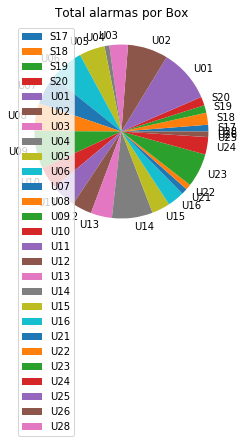

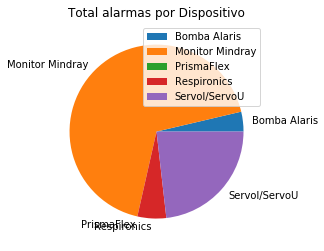

In [29]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Gráfico circular

# Total alarmas por box

fig, ax1=plt.subplots()
alarms_counts3.plot(kind='pie')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Total alarmas por Box')
ax1.legend()

# Total alarmas por dispositivo

fig, ax1=plt.subplots()
alarms_counts4.plot(kind='pie')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Total alarmas por Dispositivo')
ax1.legend()

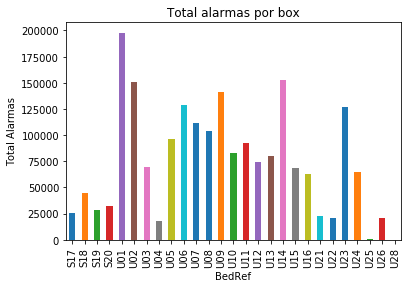

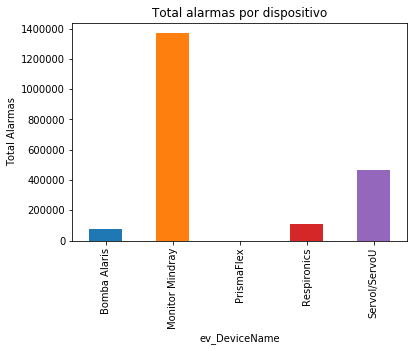

In [30]:
# Generación de gráficas con Matplotlib

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Si queremos utilizar mismos ejes en graficos (PARA FILTRADOS!!!) podemos crear:
# fig=plt.figure(figsize=(30,10))
# plt.subplot2grid((2,3),(0,0))
   
    
# Total alarmas por box
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel('Box')
ax1.set_ylabel('Total Alarmas')
ax1.set_title('Total alarmas por box')
alarms_counts3.plot(kind='bar')

# Total alarmas por dispositivo
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel('Dispositivo médico')
ax1.set_ylabel('Total Alarmas')
ax1.set_title('Total alarmas por dispositivo')
alarms_counts4.plot(kind='bar')


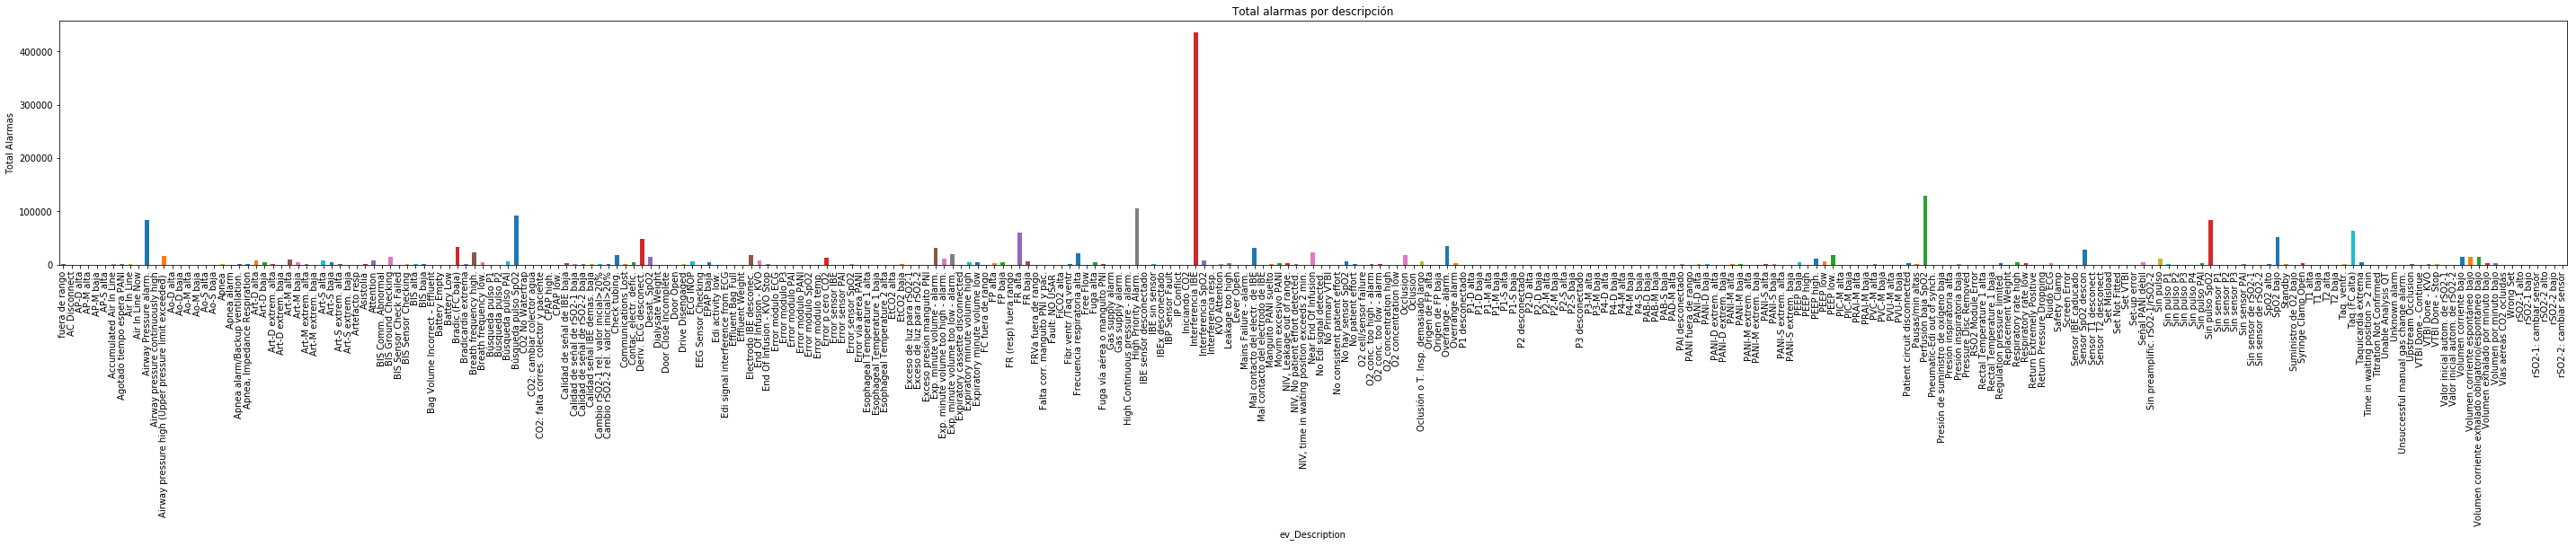

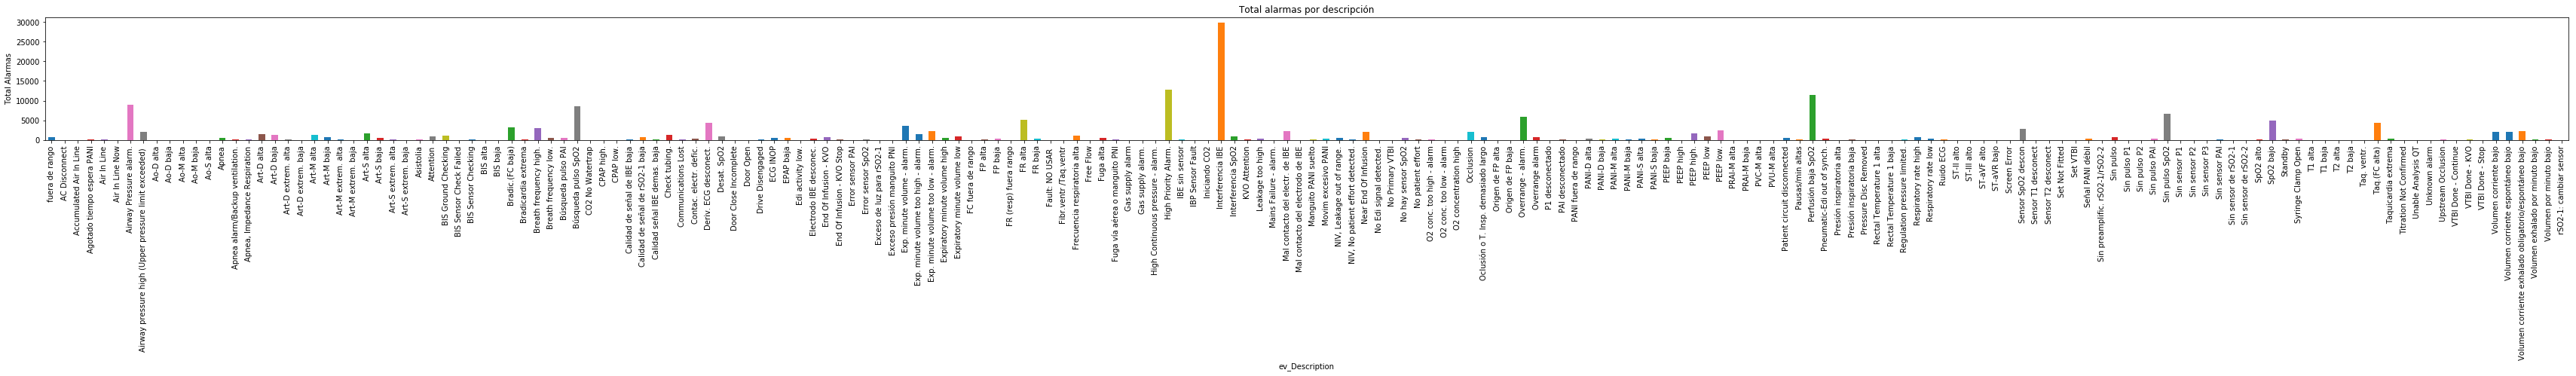

In [31]:
# Total alarmas por descripcion: vamos a realizarlo en los distintos filtrados

# Para el primer filtrado se obvia porque no hay datos significativos


# Para el segundo filtrado
alarms2_description = data_filt2.groupby('ev_Description')['ev_ID'].count()

fig=plt.figure(figsize=(50,5))
ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel('Descripción alarma')
ax1.set_ylabel('Total Alarmas')
ax1.set_title('Total alarmas por descripción')
alarms2_description.plot(kind='bar')

# Para el tercer filtrado
alarms3_description = data_filt3.groupby('ev_Description')['ev_ID'].count()

fig=plt.figure(figsize=(60,3))
ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel('Descripción alarma')
ax1.set_ylabel('Total Alarmas')
ax1.set_title('Total alarmas por descripción')
alarms3_description.plot(kind='bar')

ev_Description
Airway Pressure alarm.                                    83242
Airway pressure continuously high                             3
Airway pressure high (Upper pressure limit exceeded)      16116
Apnea alarm                                                  24
Apnea alarm/Backup ventilation.                             289
Breath frequency high.                                    23271
Breath frequency low.                                      4412
CPAP high.                                                    8
CPAP low.                                                    48
Check tubing.                                             17946
Edi activity low.                                            11
Edi signal interference from ECG                              8
Exp. minute volume - alarm.                               30849
Exp. minute volume too high - alarm.                      11443
Exp. minute volume too low - alarm.                       19549
Expiratory cassette disco

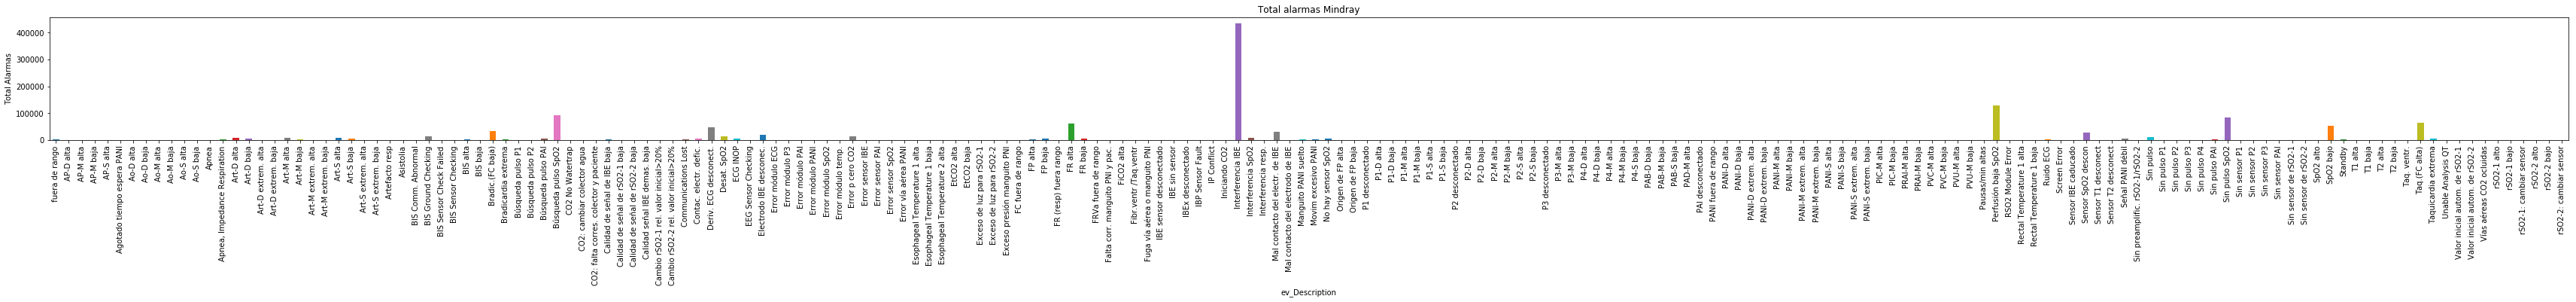

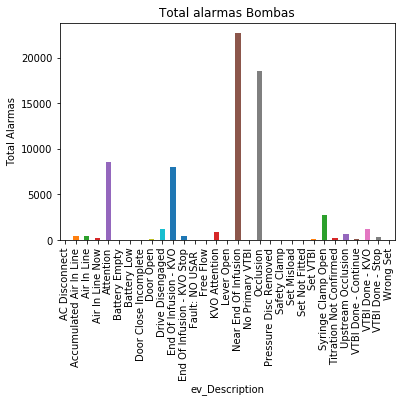

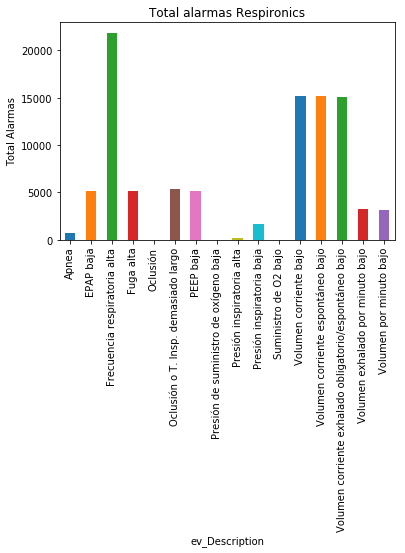

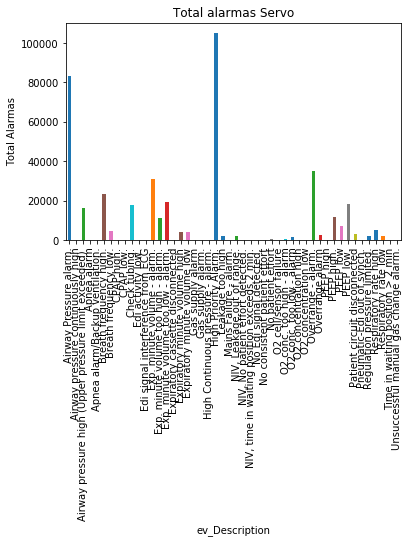

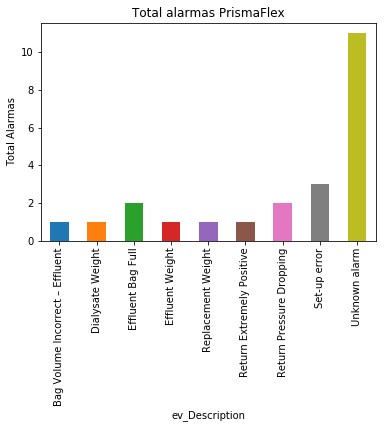

In [39]:
# Vamos a separar los estudios de alarmas en función de los dispositivos

# Para el segundo filtrado
alarms2_description_Mindray =  data_filt2[data_filt2['ev_DeviceName'] == 'Monitor Mindray']
alarms2_description_Mindray = alarms2_description_Mindray.groupby('ev_Description')['ev_ID'].count()

fig=plt.figure(figsize=(60,3))
ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel('Descripción alarma')
ax1.set_ylabel('Total Alarmas')
ax1.set_title('Total alarmas Mindray')
alarms2_description_Mindray.plot(kind='bar')

alarms2_description_Bombas =  data_filt2[data_filt2['ev_DeviceName'] == 'Bomba Alaris']
alarms2_description_Bombas = alarms2_description_Bombas.groupby('ev_Description')['ev_ID'].count()

fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel('Descripción alarma')
ax1.set_ylabel('Total Alarmas')
ax1.set_title('Total alarmas Bombas')
alarms2_description_Bombas.plot(kind='bar')

alarms2_description_Respironics =  data_filt2[data_filt2['ev_DeviceName'] == 'Respironics']
alarms2_description_Respironics = alarms2_description_Respironics.groupby('ev_Description')['ev_ID'].count()

fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel('Descripción alarma')
ax1.set_ylabel('Total Alarmas')
ax1.set_title('Total alarmas Respironics')
alarms2_description_Respironics.plot(kind='bar')

alarms2_description_Servo =  data_filt2[data_filt2['ev_DeviceName'] == 'ServoI/ServoU']
alarms2_description_Servo = alarms2_description_Servo.groupby('ev_Description')['ev_ID'].count()
print(alarms2_description_Servo)

fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel('Descripción alarma')
ax1.set_ylabel('Total Alarmas')
ax1.set_title('Total alarmas Servo')
alarms2_description_Servo.plot(kind='bar')

alarms2_description_PrismaFlex =  data_filt2[data_filt2['ev_DeviceName'] == 'PrismaFlex']
alarms2_description_PrismaFlex = alarms2_description_PrismaFlex.groupby('ev_Description')['ev_ID'].count()

fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel('Descripción alarma')
ax1.set_ylabel('Total Alarmas')
ax1.set_title('Total alarmas PrismaFlex')
alarms2_description_PrismaFlex.plot(kind='bar')


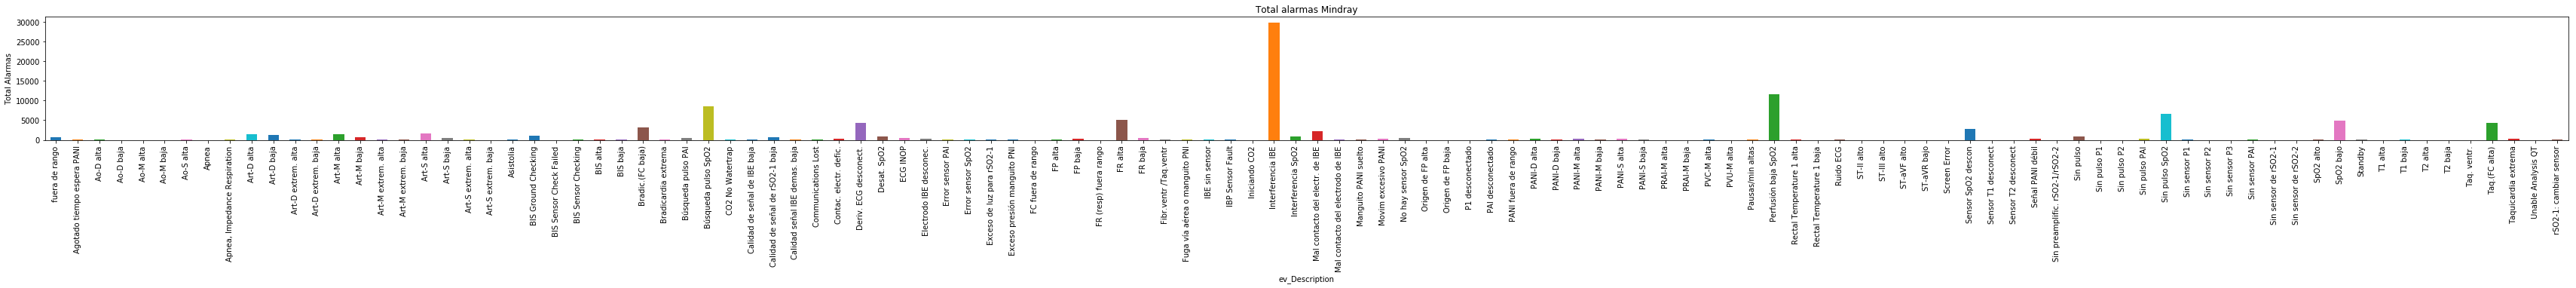

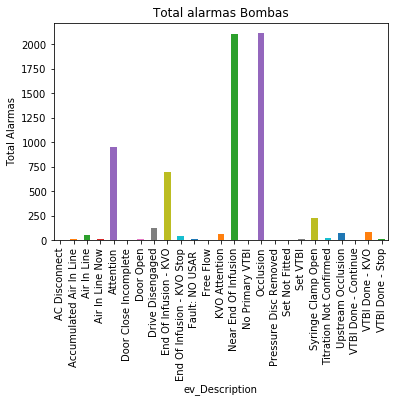

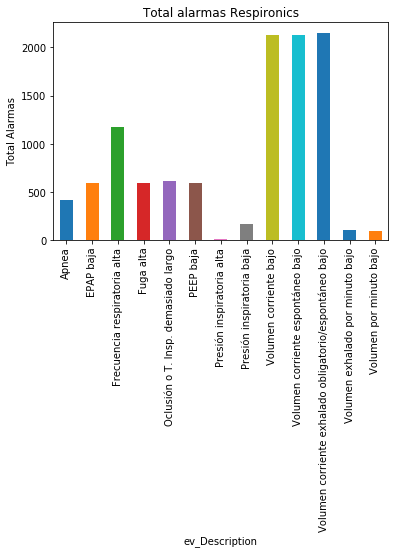

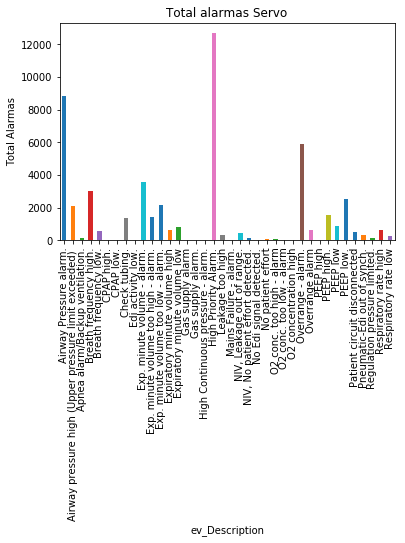

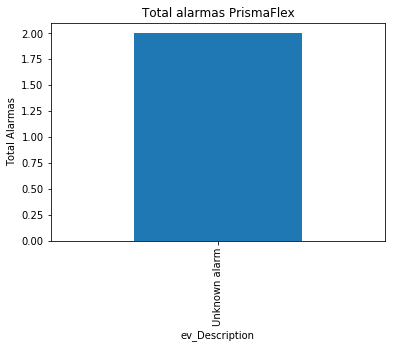

In [43]:
# Para el tercer filtrado

alarms3_description_Mindray =  data_filt3[data_filt3['ev_DeviceName'] == 'Monitor Mindray']
alarms3_description_Mindray = alarms3_description_Mindray.groupby('ev_Description')['ev_ID'].count()

fig=plt.figure(figsize=(60,3))
ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel('Descripción alarma')
ax1.set_ylabel('Total Alarmas')
ax1.set_title('Total alarmas Mindray')
alarms3_description_Mindray.plot(kind='bar')

alarms3_description_Bombas =  data_filt3[data_filt3['ev_DeviceName'] == 'Bomba Alaris']
alarms3_description_Bombas = alarms3_description_Bombas.groupby('ev_Description')['ev_ID'].count()

fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel('Descripción alarma')
ax1.set_ylabel('Total Alarmas')
ax1.set_title('Total alarmas Bombas')
alarms3_description_Bombas.plot(kind='bar')

alarms3_description_Respironics =  data_filt3[data_filt3['ev_DeviceName'] == 'Respironics']
alarms3_description_Respironics = alarms3_description_Respironics.groupby('ev_Description')['ev_ID'].count()

fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel('Descripción alarma')
ax1.set_ylabel('Total Alarmas')
ax1.set_title('Total alarmas Respironics')
alarms3_description_Respironics.plot(kind='bar')

alarms3_description_Servo =  data_filt3[data_filt3['ev_DeviceName'] == 'ServoI/ServoU']
alarms3_description_Servo = alarms3_description_Servo.groupby('ev_Description')['ev_ID'].count()

fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel('Descripción alarma')
ax1.set_ylabel('Total Alarmas')
ax1.set_title('Total alarmas Servo')
alarms3_description_Servo.plot(kind='bar')

alarms3_description_PrismaFlex =  data_filt3[data_filt3['ev_DeviceName'] == 'PrismaFlex']
alarms3_description_PrismaFlex = alarms3_description_PrismaFlex.groupby('ev_Description')['ev_ID'].count()

fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel('Descripción alarma')
ax1.set_ylabel('Total Alarmas')
ax1.set_title('Total alarmas PrismaFlex')
alarms3_description_PrismaFlex.plot(kind='bar')

In [41]:
# Vamos a despresciar todas las alarmas que recojan menos del 2% del total de las alarmas, ya que  es un valor muy bajo.

# Monitores

ev_Description
Airway Pressure alarm.                                    83242
Airway pressure continuously high                             3
Airway pressure high (Upper pressure limit exceeded)      16116
Apnea alarm                                                  24
Apnea alarm/Backup ventilation.                             289
Breath frequency high.                                    23271
Breath frequency low.                                      4412
CPAP high.                                                    8
CPAP low.                                                    48
Check tubing.                                             17946
Edi activity low.                                            11
Edi signal interference from ECG                              8
Exp. minute volume - alarm.                               30849
Exp. minute volume too high - alarm.                      11443
Exp. minute volume too low - alarm.                       19549
Expiratory cassette disco

In [47]:
print(alarms2_description_Bombas)

ev_Description
AC Disconnect                    18
Accumulated Air In Line         396
Air In Line                     486
Air In Line Now                 192
Attention                      8539
Battery Empty                     5
Battery Low                      18
Door Close Incomplete            23
Door Open                        98
Drive Disengaged               1258
End Of Infusion - KVO          7988
End Of Infusion - KVO Stop      469
Fault: NO USAR                   34
Free Flow                        28
KVO Attention                   901
Lever Open                       13
Near End Of Infusion          22715
No Primary VTBI                  21
Occlusion                     18507
Pressure Disc Removed            14
Safety Clamp                      2
Set Misload                       1
Set Not Fitted                    7
Set VTBI                        154
Syringe Clamp Open             2697
Titration Not Confirmed         206
Upstream Occlusion              666
VTBI Done - C

In [48]:
print(alarms3_description_Bombas)

ev_Description
AC Disconnect                    1
Accumulated Air In Line         10
Air In Line                     48
Air In Line Now                 15
Attention                      945
Door Close Incomplete            2
Door Open                        7
Drive Disengaged               118
End Of Infusion - KVO          693
End Of Infusion - KVO Stop      44
Fault: NO USAR                   6
Free Flow                        1
KVO Attention                   60
Near End Of Infusion          2109
No Primary VTBI                  2
Occlusion                     2115
Pressure Disc Removed            3
Set Not Fitted                   1
Set VTBI                        12
Syringe Clamp Open             224
Titration Not Confirmed         23
Upstream Occlusion              75
VTBI Done - Continue             4
VTBI Done - KVO                 87
VTBI Done - Stop                11
Name: ev_ID, dtype: int64


2018-07-02
